In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
sns.set(font_scale=2)

In [3]:
reddit = pd.read_csv('Data/reddit_data.csv', index_col=0)
biden = pd.read_csv('Data/approval_topline.csv', index_col=0)

In [4]:
reddit.head()

author                                               body  \
0      Flip2428  Growing up there I was always dumbfounded on h...   
1      boatpile  Gaetz didn't even say "no age you can't be sex...   
2  theombudsmen  I'm sure everyone knows this, but to clarify t...   
3      Tony_Chu  Hang up decorations with zip ties and cheer th...   
4      Fellums2  Aside from the fact that he is just awful, he ...   

           created_utc                                          permalink  \
0  2021-04-01 17:17:58  /r/politics/comments/mhy1zm/new_mexico_is_set_...   
1  2021-04-01 17:17:58  /r/politics/comments/mhuv7u/theres_no_age_that...   
2  2021-04-01 17:17:56  /r/politics/comments/mhzm4r/the_gop_rightly_fe...   
3  2021-04-01 17:17:54  /r/politics/comments/mhulza/biden_must_clean_u...   
4  2021-04-01 17:17:53  /r/politics/comments/mhmik7/ap_poll_finds_bide...   

   score subreddit  total_awards_received  Polarity  Subjectivity Sentiment  \
0      1  politics                      0 -0.051389      0.368056  Negative   
1      1  politics                      0  0.412500      0.820833  Positive   
2      1  politics                      0  0.100000      0.853472  Positive   
3      1  politics                      0  0.000000      0.000000   Neutral   
4      1  politics                      0 -0.284821      0.735714  Negative   

       date    target  
0  4/1/2021  53.43079  
1  4/1/2021  53.43079  
2  4/1/2021  53.43079  
3  4/1/2021  53.43079  
4  4/1/2021  53.43079

In [3]:
politics = reddit.loc[reddit['subreddit'] == 'politics']
news = reddit.loc[reddit['subreddit'] == 'news']
liberal = reddit.loc[reddit['subreddit'] == 'Liberal']
democrats = reddit.loc[reddit['subreddit'] == 'democrats']
conservative = reddit.loc[reddit['subreddit'] == 'Conservative']
libertarian = reddit.loc[reddit['subreddit'] == 'Libertarian']

In [4]:
politics_text = " ".join(comment for comment in politics['body'])
news_text = " ".join(comment for comment in news['body'])
liberal_text = " ".join(comment for comment in liberal['body'])
democrats_text = " ".join(comment for comment in democrats['body'])
conservative_text = " ".join(comment for comment in conservative['body'])
libertarian_text = " ".join(comment for comment in libertarian['body'])

In [5]:
negative = reddit.loc[reddit['Sentiment'] == 'Negative']
positive = reddit.loc[reddit['Sentiment'] == 'Positive']

In [6]:
politics_negative = negative.loc[negative['subreddit'] == 'politics']
news_negative = negative.loc[negative['subreddit'] == 'news']
liberal_negative = negative.loc[negative['subreddit'] == 'Liberal']
democrats_negative = negative.loc[negative['subreddit'] == 'democrats']
conservative_negative = negative.loc[negative['subreddit'] == 'Conservative']
libertarian_negative = negative.loc[negative['subreddit'] == 'Libertarian']

In [7]:
politics_text_negative = " ".join(comment for comment in politics_negative['body'])
news_text_negative = " ".join(comment for comment in news_negative['body'])
liberal_text_negative = " ".join(comment for comment in liberal_negative['body'])
democrats_text_negative = " ".join(comment for comment in democrats_negative['body'])
conservative_text_negative = " ".join(comment for comment in conservative_negative['body'])
libertarian_text_negative = " ".join(comment for comment in libertarian_negative['body'])

In [8]:
politics_positive = positive.loc[positive['subreddit'] == 'politics']
news_positive = positive.loc[positive['subreddit'] == 'news']
liberal_positive = positive.loc[positive['subreddit'] == 'Liberal']
democrats_positive = positive.loc[positive['subreddit'] == 'democrats']
conservative_positive = positive.loc[positive['subreddit'] == 'Conservative']
libertarian_positive = positive.loc[positive['subreddit'] == 'Libertarian']

In [10]:
politics_text_positive = " ".join(comment for comment in politics_positive['body'])
news_text_positive = " ".join(comment for comment in news_positive['body'])
liberal_text_positive = " ".join(comment for comment in liberal_positive['body'])
democrats_text_positive = " ".join(comment for comment in democrats_positive['body'])
conservative_text_positive = " ".join(comment for comment in conservative_positive['body'])
libertarian_text_positive = " ".join(comment for comment in libertarian_positive['body'])

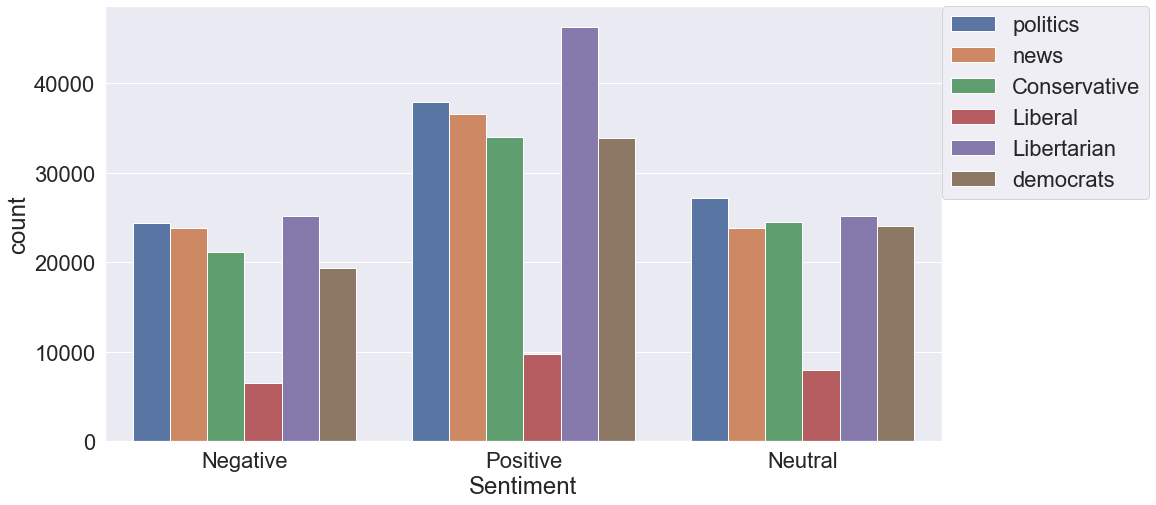

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=reddit, x='Sentiment', hue='subreddit')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0);

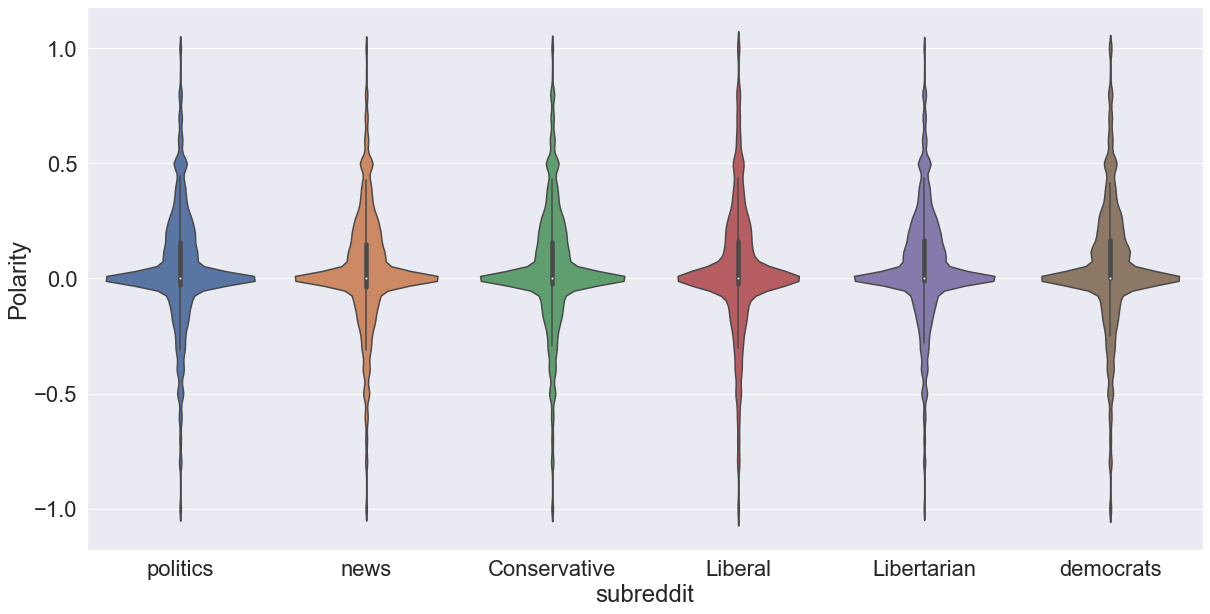

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.violinplot(y='Polarity', data=reddit, x='subreddit');

In [12]:
stopwords = set(STOPWORDS)
stopwords.update(['people', 'one', 'think', 'gt', 'reddit', 'https', 'know', 'will', 'make', 'even', 'u'])

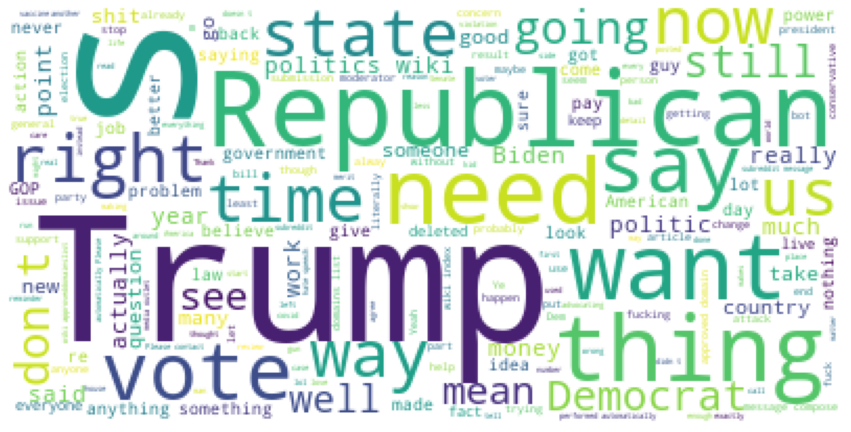

In [20]:
politics_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(politics_text)
plt.figure(figsize=(15,15))
plt.imshow(politics_wordcloud)
plt.axis("off")
plt.show()

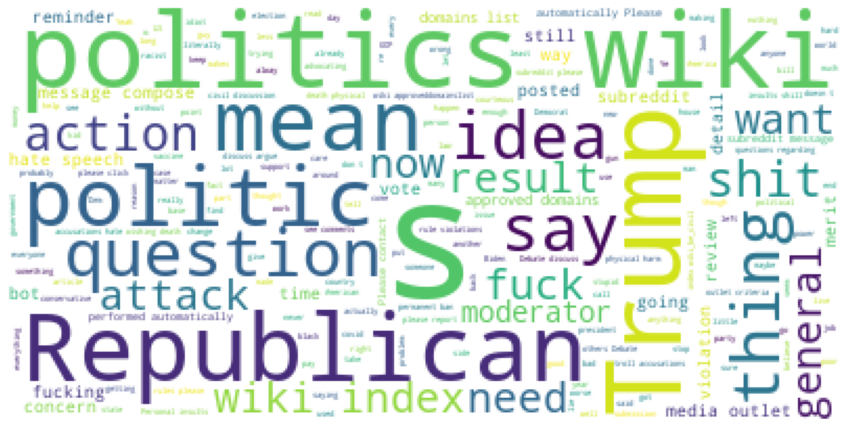

In [13]:
politics_wordcloud_negative = WordCloud(stopwords=stopwords, background_color='white').generate(politics_text_negative)
plt.figure(figsize=(15,15))
plt.imshow(politics_wordcloud_negative)
plt.axis("off")
plt.show()

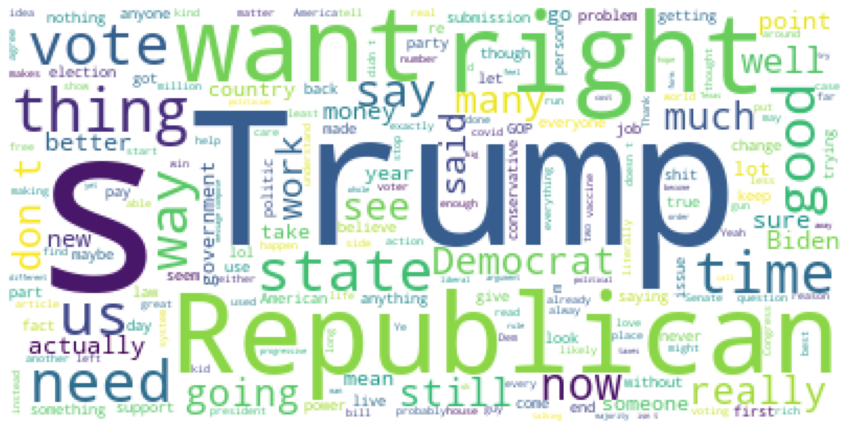

In [14]:
politics_wordcloud_positive = WordCloud(stopwords=stopwords, background_color='white').generate(politics_text_positive)
plt.figure(figsize=(15,15))
plt.imshow(politics_wordcloud_positive)
plt.axis("off")
plt.show()

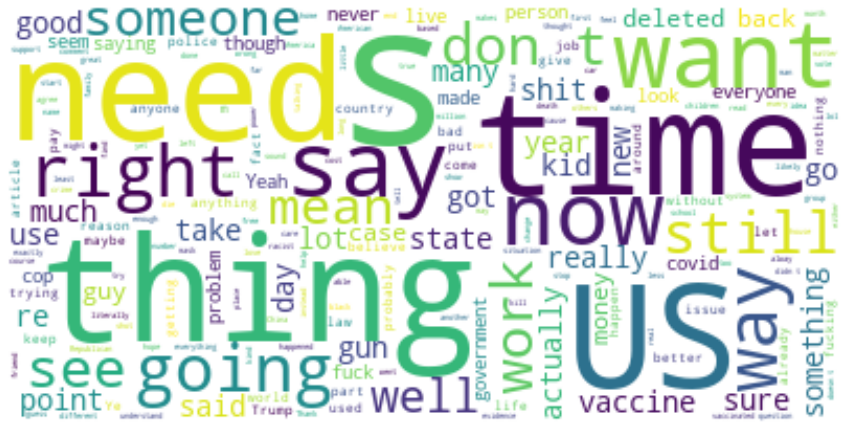

In [15]:
news_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(news_text)
plt.figure(figsize=(15,15))
plt.imshow(news_wordcloud)
plt.axis("off")
plt.show()

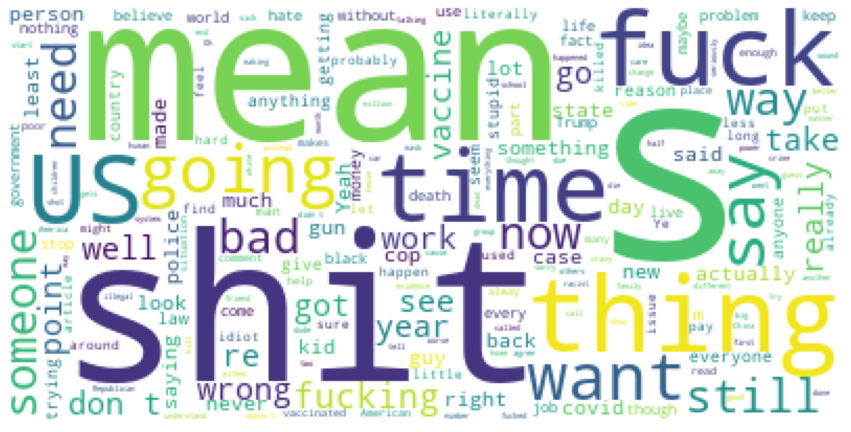

In [15]:
news_wordcloud_negative = WordCloud(stopwords=stopwords, background_color='white').generate(news_text_negative)
plt.figure(figsize=(15,15))
plt.imshow(news_wordcloud_negative)
plt.axis("off")
plt.show()

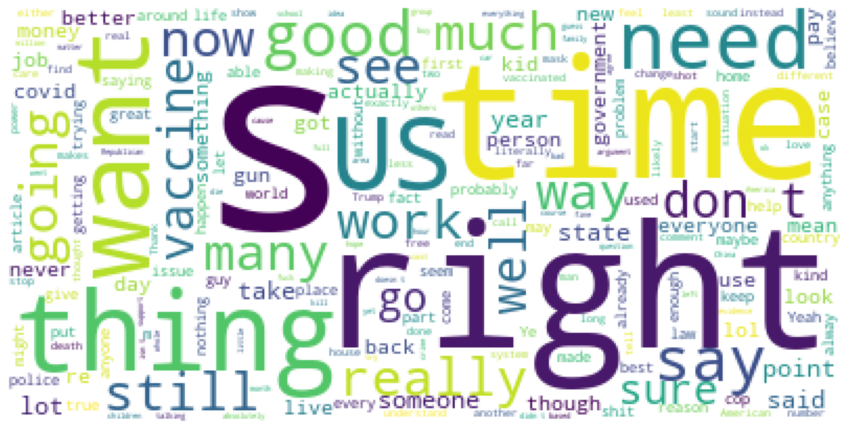

In [16]:
news_wordcloud_positive = WordCloud(stopwords=stopwords, background_color='white').generate(news_text_positive)
plt.figure(figsize=(15,15))
plt.imshow(news_wordcloud_positive)
plt.axis("off")
plt.show()

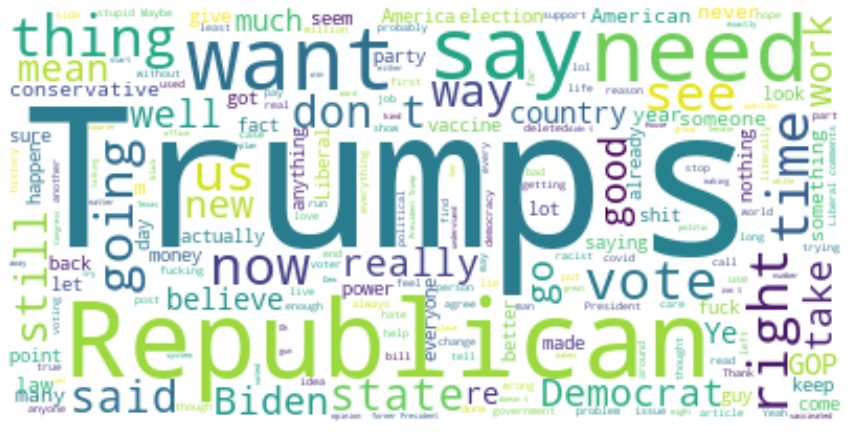

In [16]:
liberal_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(liberal_text)
plt.figure(figsize=(15,15))
plt.imshow(liberal_wordcloud)
plt.axis("off")
plt.show()

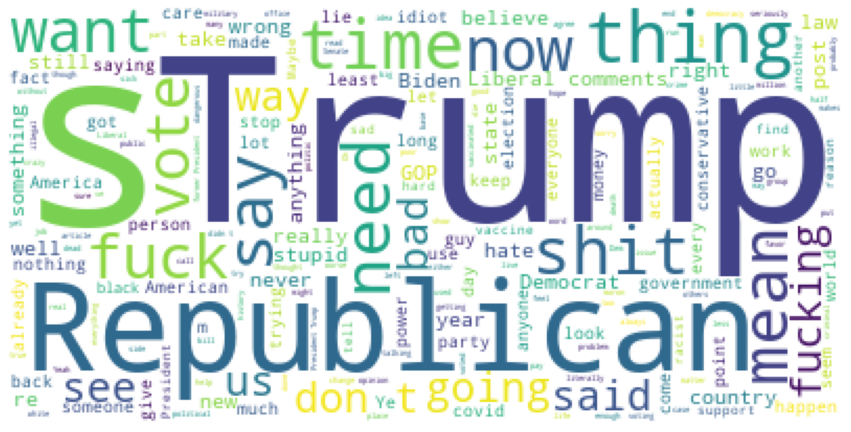

In [17]:
liberal_wordcloud_negative = WordCloud(stopwords=stopwords, background_color='white').generate(liberal_text_negative)
plt.figure(figsize=(15,15))
plt.imshow(liberal_wordcloud_negative)
plt.axis("off")
plt.show()

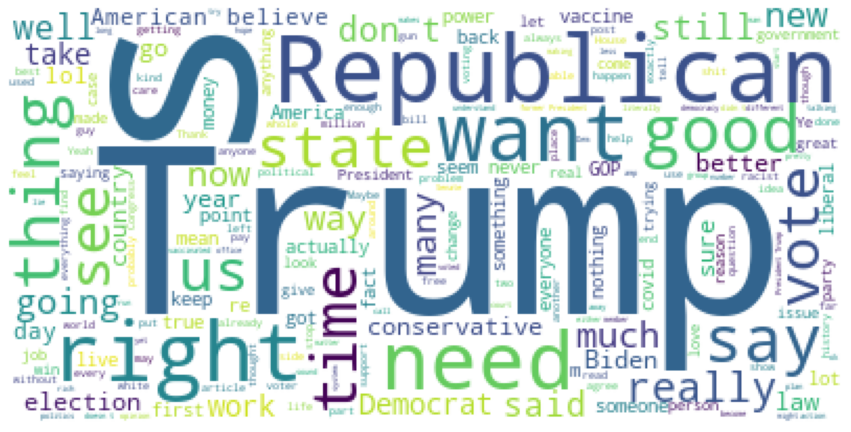

In [18]:
liberal_wordcloud_positive = WordCloud(stopwords=stopwords, background_color='white').generate(liberal_text_positive)
plt.figure(figsize=(15,15))
plt.imshow(liberal_wordcloud_positive)
plt.axis("off")
plt.show()

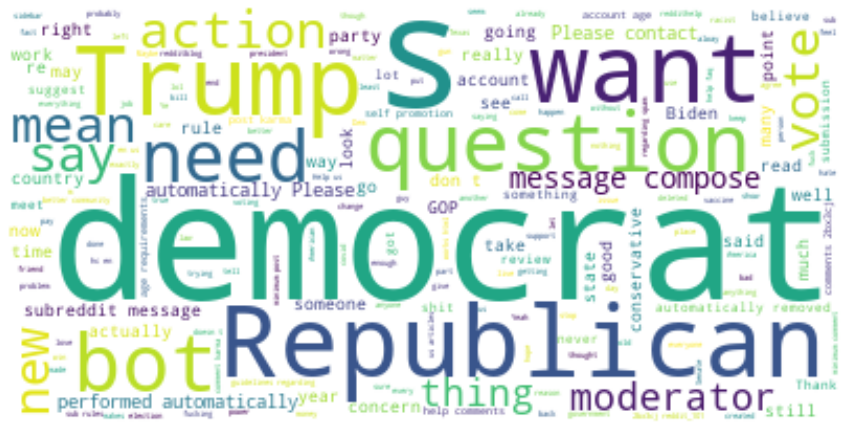

In [17]:
democrats_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(democrats_text)
plt.figure(figsize=(15,15))
plt.imshow(democrats_wordcloud)
plt.axis("off")
plt.show()

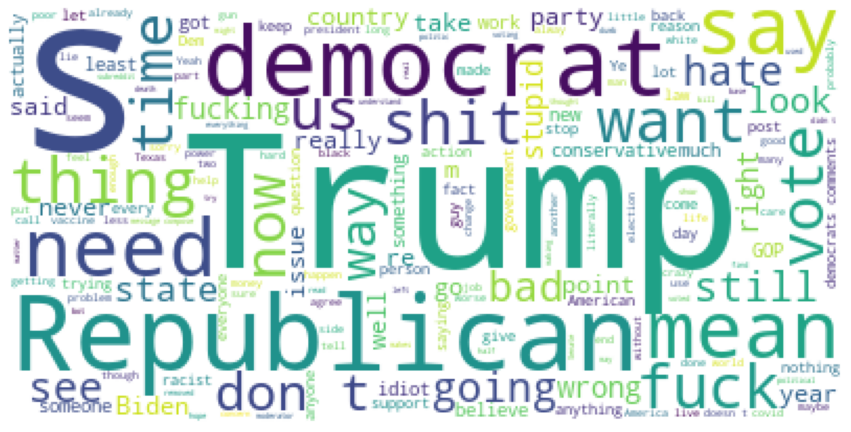

In [19]:
democrats_wordcloud_negative = WordCloud(stopwords=stopwords, background_color='white').generate(democrats_text_negative)
plt.figure(figsize=(15,15))
plt.imshow(democrats_wordcloud_negative)
plt.axis("off")
plt.show()

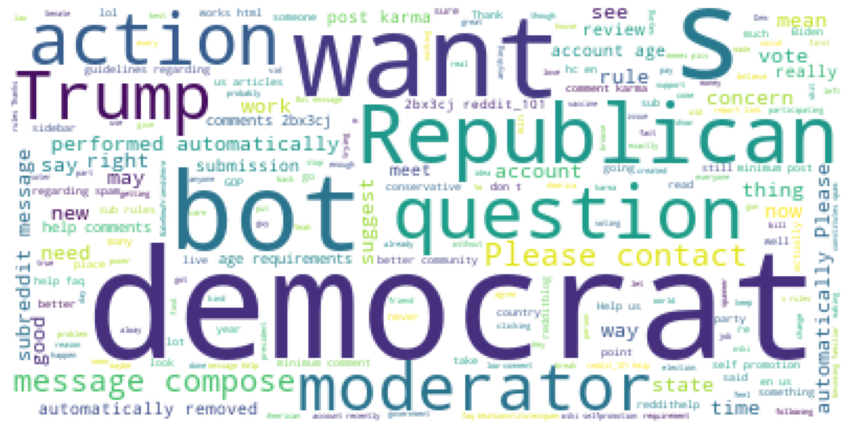

In [20]:
democrats_wordcloud_positive = WordCloud(stopwords=stopwords, background_color='white').generate(democrats_text_positive)
plt.figure(figsize=(15,15))
plt.imshow(democrats_wordcloud_positive)
plt.axis("off")
plt.show()

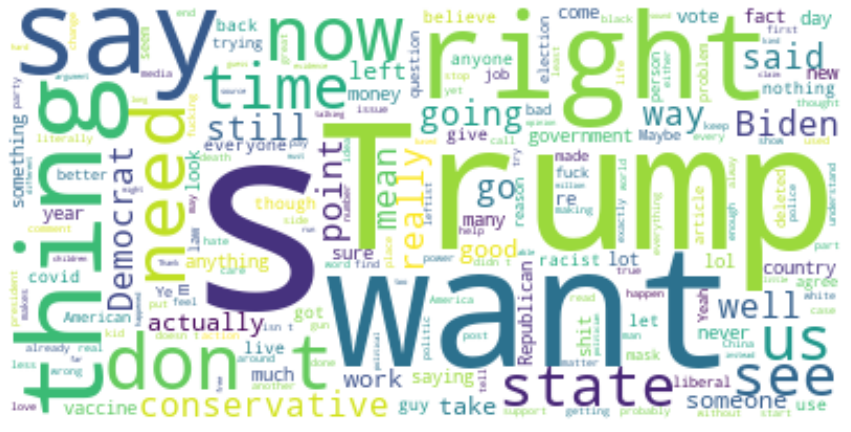

In [18]:
conservative_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(conservative_text)
plt.figure(figsize=(15,15))
plt.imshow(conservative_wordcloud)
plt.axis("off")
plt.show()

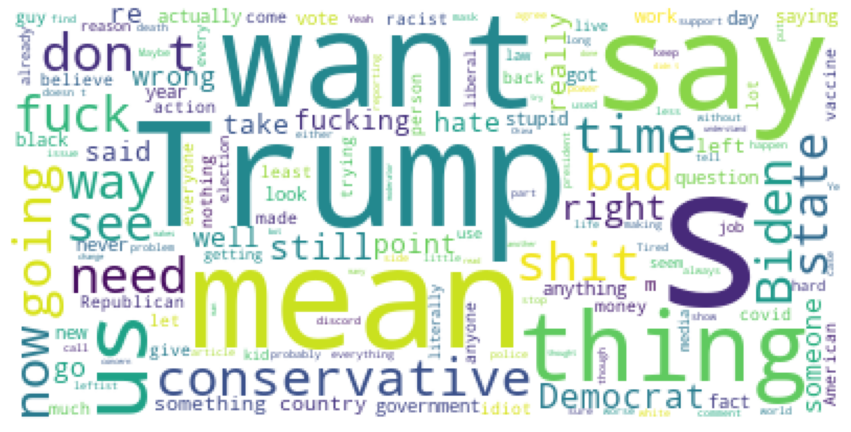

In [21]:
conservative_wordcloud_negative = WordCloud(stopwords=stopwords, background_color='white').generate(conservative_text_negative)
plt.figure(figsize=(15,15))
plt.imshow(conservative_wordcloud_negative)
plt.axis("off")
plt.show()

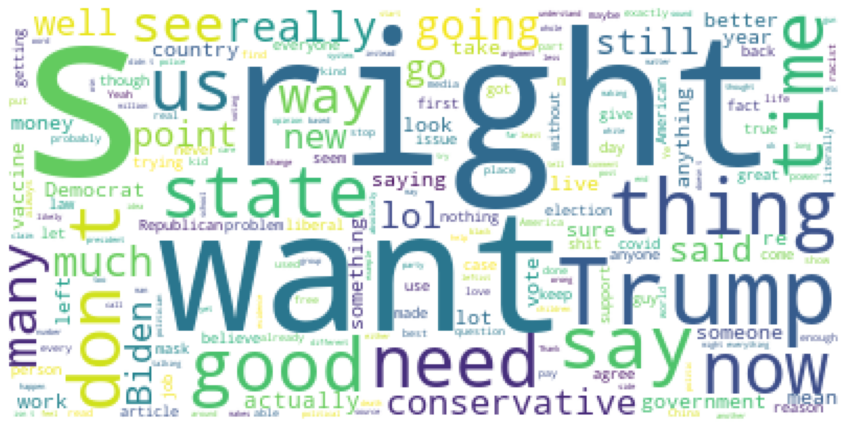

In [22]:
conservative_wordcloud_positive = WordCloud(stopwords=stopwords, background_color='white').generate(conservative_text_positive)
plt.figure(figsize=(15,15))
plt.imshow(conservative_wordcloud_positive)
plt.axis("off")
plt.show()

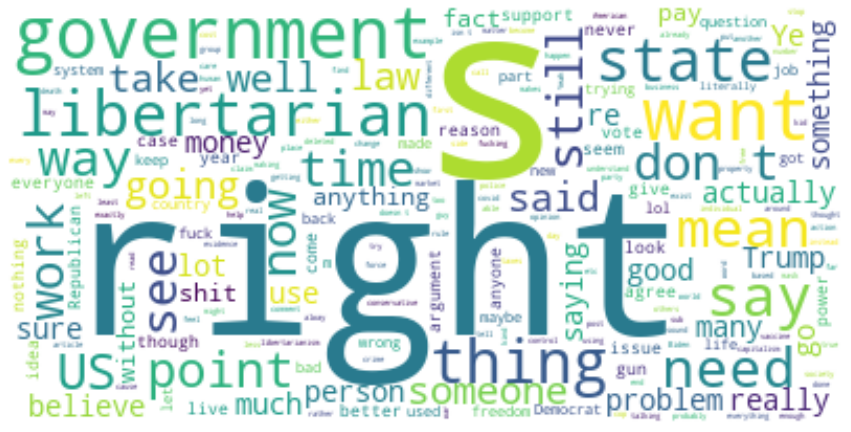

In [19]:
libertarian_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(libertarian_text)
plt.figure(figsize=(15,15))
plt.imshow(libertarian_wordcloud)
plt.axis("off")
plt.show()

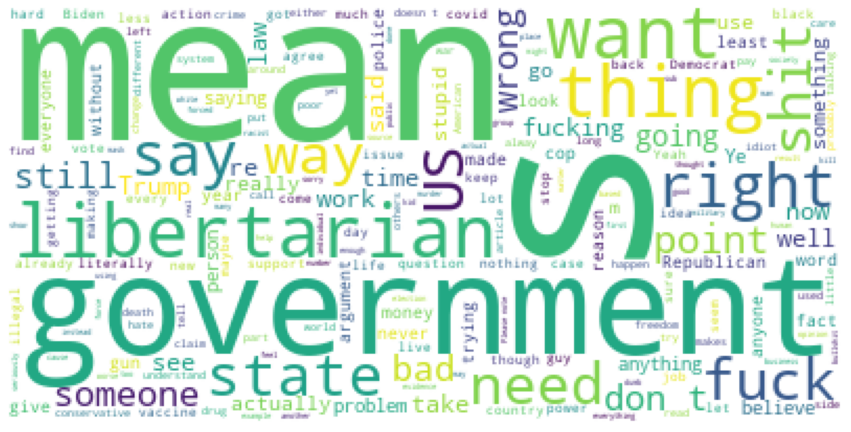

In [23]:
libertarian_wordcloud_negative = WordCloud(stopwords=stopwords, background_color='white').generate(libertarian_text_negative)
plt.figure(figsize=(15,15))
plt.imshow(libertarian_wordcloud_negative)
plt.axis("off")
plt.show()

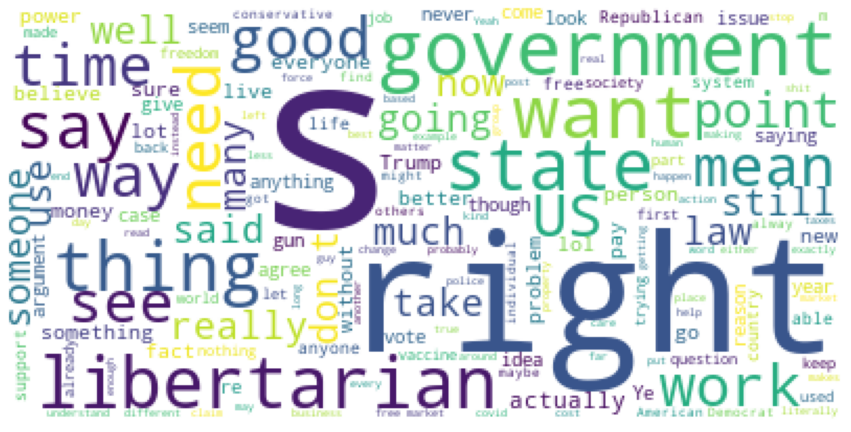

In [24]:
libertarian_wordcloud_positive = WordCloud(stopwords=stopwords, background_color='white').generate(libertarian_text_positive)
plt.figure(figsize=(15,15))
plt.imshow(libertarian_wordcloud_positive)
plt.axis("off")
plt.show()

C:\Users\ferra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


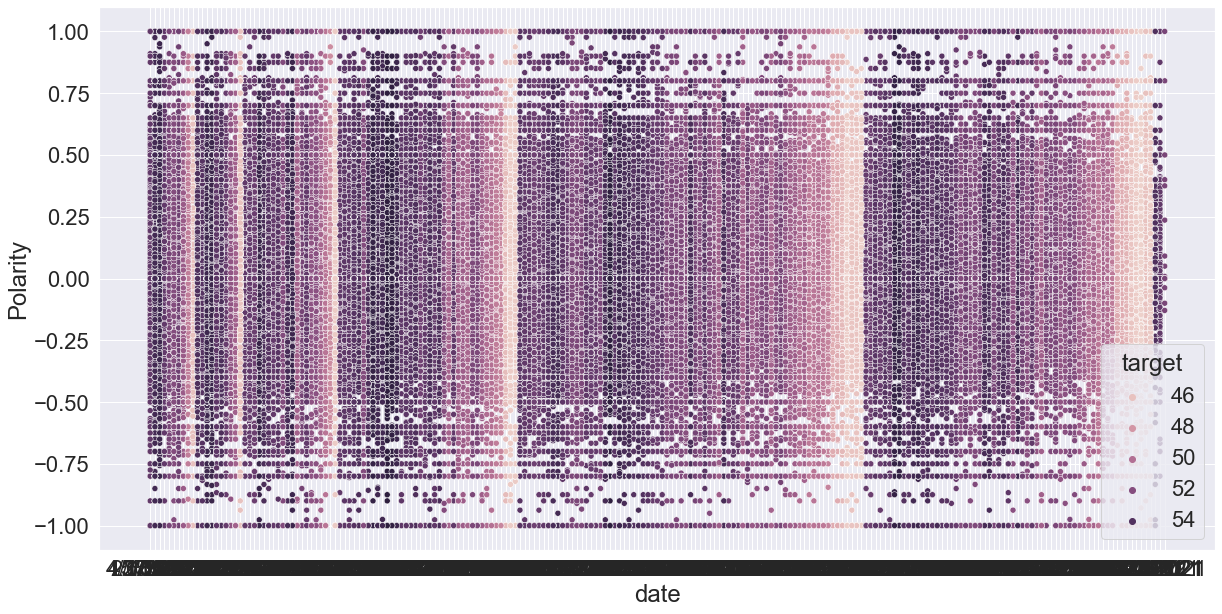

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x='date', y='Polarity', data=reddit, hue='target');